# **Solución Ecuación de Renovación Via Método Transformada de Laplace**

### 💡 Solución de la ecuación de renovación por transformada de Laplace

Partimos de la ecuación de renovación epidemiológica en su forma continua:


$$f(t) = \mu(t) + R_0 \int_0^t f(t - \tau) \, g(\tau) \, d\tau$$


Al aplicar la transformada de Laplace, utilizando las propiedades de la convolución, obtenemos:

$$
\mathcal{L}\{f(t)\} = \mathcal{L}\{\mu(t)\} + R_0 \cdot \mathcal{L}\{f(t)\} \cdot \mathcal{L}\{g(t)\}
$$

Despejando:

$$
F(s) = \frac{\mathcal{L}\{\mu(t)\}}{1 - R_0 \cdot \mathcal{L}\{g(t)\}}
$$

Para esta implementación, se asumió que:

- $\mu(t) = \lambda e^{-\lambda t}$, con transformada de Laplace:  
  $$
  \mathcal{L}\{\mu(t)\} = \frac{\lambda}{\lambda + s}
  $$

- $ g(t) \sim \text{Gamma}(\alpha, \beta) $, con transformada:  
  $$
  \mathcal{L}\{g(t)\} = \left( \frac{\beta}{\beta + s} \right)^\alpha
  $$

Sustituyendo, se tiene la expresión final:

$$
F(s) = \frac{\lambda}{\lambda + s} \cdot \frac{1}{1 - R_0 \cdot \left( \frac{\beta}{\beta + s} \right)^\alpha}
$$

Esta función se invierte numéricamente para obtener $ f(t) $, el número esperado de nuevos contagios diarios.

---

### 🧩 Justificación como complemento al método MCMC

Esta solución analítica permite explorar la dinámica general del modelo de renovación **sin necesidad de datos observados**. Al fijar un número reproductivo $R_0$ constante, una fuente exógena decaída y un intervalo serial teórico, se obtiene un comportamiento de referencia del sistema.

Esto sirve como una herramienta complementaria al enfoque bayesiano con MCMC que se implementa en este trabajo. Mientras que el método MCMC se enfoca en **estimar $ R_t $** a partir de datos reales con incertidumbre, esta solución **permite visualizar el efecto estructural de $ R_0 $** y validar que el modelo reproduce comportamientos epidemiológicamente esperados (crecimiento si $ R_0 > 1 $, estabilidad si $ R_0 = 1 $, y decaimiento si $ R_0 < 1 $).

En conjunto, ambas aproximaciones fortalecen la comprensión del fenómeno, al combinar intuición mecánica (Laplace) con inferencia estadística (MCMC).


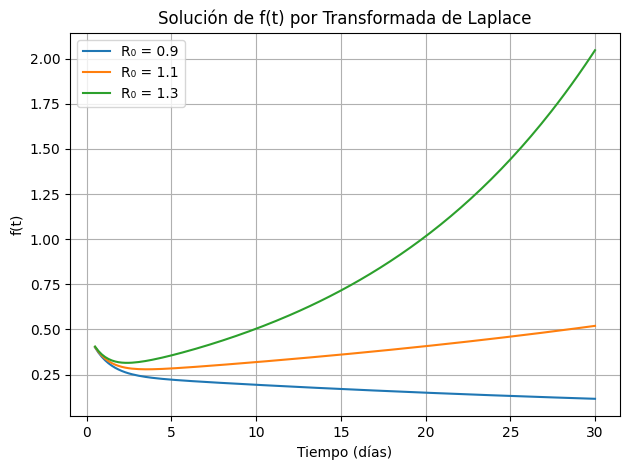

In [ ]:
# Instalar mpmath si no lo tienes
!pip install mpmath

# Importar librerías necesarias
from mpmath import invertlaplace, fp, gamma, exp, power, mp
import numpy as np
import matplotlib.pyplot as plt

# Configurar precisión de mpmath
mp.dps = 25  # dígitos decimales de precisión

# --- Parámetros del modelo ---
lambda_ = 0.5      # Tasa de llegada exógena (μ(t) = λ e^{-λt})
alpha = 2          # Forma de la gamma (g(t) ~ Gamma(α, β))
beta = 0.5         # Tasa inversa de la gamma
R0_values = [0.9, 1.1, 1.3]  # Valores de R₀ a explorar

# --- Vector de tiempos ---
t_vals = np.linspace(0.5, 30, 150)  # de 0.5 a 30 días

# --- Definir F(s) ---
def F_s(s, R0):
    L_mu = lambda_ / (lambda_ + s)
    L_g = power(beta / (beta + s), alpha)
    return L_mu / (1 - R0 * L_g)

# --- Inversión numérica de la transformada ---
f_results = {}

for R0 in R0_values:
    f_t = [float(invertlaplace(lambda s: F_s(s, R0), t, method='talbot')) for t in t_vals]
    f_results[R0] = f_t

# --- Graficar ---
for R0 in R0_values:
    plt.plot(t_vals, f_results[R0], label=f"R₀ = {R0}")

plt.title("Solución de f(t) por Transformada de Laplace")
plt.xlabel("Tiempo (días)")
plt.ylabel("f(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔄 Resolución de la ecuación de renovación mediante transformada de Laplace

Se considera la ecuación de renovación en su forma integral continua:

$$
f(t) = \mu(t) + R_0 \int_0^t f(t - \tau) \, g(\tau) \, d\tau
$$

Aplicando la **transformada de Laplace** y utilizando la propiedad de la convolución, se obtiene:

$$
F(s) = \frac{\mathcal{L}\{\mu(t)\}}{1 - R_0 \cdot \mathcal{L}\{g(t)\}}
$$

Asumiendo:
- $ \mu(t) = \lambda e^{-\lambda t} \Rightarrow \mathcal{L}\{\mu(t)\} = \frac{\lambda}{\lambda + s} $
- $ g(t) \sim \text{Gamma}(\alpha, \beta) \Rightarrow \mathcal{L}\{g(t)\} = \left( \frac{\beta}{\beta + s} \right)^\alpha $

Se obtiene la expresión:

$$
F(s) = \frac{\lambda}{\lambda + s} \cdot \frac{1}{1 - R_0 \cdot \left( \frac{\beta}{\beta + s} \right)^\alpha}
$$

El objetivo es recuperar \( f(t) \) mediante **inversión numérica** de \( F(s) \).

---

### 🧠 Método utilizado

Se emplea la función `invertlaplace()` del paquete `mpmath` de Python, utilizando el **método de Talbot**, una técnica eficiente de contorno en el plano complejo para resolver integrales inversas de Laplace.

Este método reconstruye $ f(t) $ a partir de su transformada $ F(s) $ de manera precisa y estable para funciones suaves, como las que se derivan de la ecuación de renovación con supuestos paramétricos.

---

### 📈 Resultados esperados

- Para $ R_0 < 1 $: $ f(t) $ decrece → brote contenido
- Para $ R_0 = 1 $: $ f(t) $ se estabiliza → brote endémico
- Para $ R_0 > 1 $: $ f(t) $ crece → brote epidémico

Este análisis complementa el enfoque de MCMC al **explorar el comportamiento teórico del sistema** sin necesidad de ajustar a datos reales.
